<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [14]:
df

PRIMARY_KEY          STATE  YEAR  ENROLL  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992     NaN      2678885.0   
1            1992_ALASKA         ALASKA  1992     NaN      1049591.0   
2           1992_ARIZONA        ARIZONA  1992     NaN      3258079.0   
3          1992_ARKANSAS       ARKANSAS  1992     NaN      1711959.0   
4        1992_CALIFORNIA     CALIFORNIA  1992     NaN     26260025.0   
...                  ...            ...   ...     ...            ...   
1710       2019_VIRGINIA       VIRGINIA  2019     NaN            NaN   
1711     2019_WASHINGTON     WASHINGTON  2019     NaN            NaN   
1712  2019_WEST_VIRGINIA  WEST_VIRGINIA  2019     NaN            NaN   
1713      2019_WISCONSIN      WISCONSIN  2019     NaN            NaN   
1714        2019_WYOMING        WYOMING  2019     NaN            NaN   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0            304177.0      1659028.0       715680.0          2653798.0   
1            106780.0       720711.0       222100.0           972488.0   
2            297888.0      1369815.0      1590376.0          3401580.0   
3            178571.0       958785.0       574603.0          1743022.0   
4           2072470.0     16546514.0      7641041.0         27138832.0   
...               ...            ...            ...                ...   
1710              NaN            NaN            NaN                NaN   
1711              NaN            NaN            NaN                NaN   
1712              NaN            NaN            NaN                NaN   
1713              NaN            NaN            NaN                NaN   
1714              NaN            NaN            NaN                NaN   

      INSTRUCTION_EXPENDITURE  ...  GRADES_4_G  GRADES_8_G  GRADES_12_G  \
0                   1481703.0  ...     57948.0     58025.0      41167.0   
1                    498362.0  ...      9748.0      8789.0       6714.0   
2                   1435908.0  ...     55433.0     49081.0      37410.0   
3                    964323.0  ...     34632.0     36011.0      27651.0   
4                  14358922.0  ...    418418.0    363296.0     270675.0   
...                       ...  ...         ...         ...          ...   
1710                      NaN  ...         NaN         NaN          NaN   
1711                      NaN  ...         NaN         NaN          NaN   
1712                      NaN  ...         NaN         NaN          NaN   
1713                      NaN  ...         NaN         NaN          NaN   
1714                      NaN  ...         NaN         NaN          NaN   

      GRADES_1_8_G  GRADES_9_12_G  GRADES_ALL_G  AVG_MATH_4_SCORE  \
0              NaN            NaN      731634.0             208.0   
1              NaN            NaN      122487.0               NaN   
2              NaN            NaN      673477.0             215.0   
3              NaN            NaN      441490.0             210.0   
4              NaN            NaN     5254844.0             208.0   
...            ...            ...           ...               ...   
1710           NaN            NaN           NaN             247.0   
1711           NaN            NaN           NaN             240.0   
1712           NaN            NaN           NaN             231.0   
1713           NaN            NaN           NaN             242.0   
1714           NaN            NaN           NaN             246.0   

      AVG_MATH_8_SCORE  AVG_READING_4_SCORE  AVG_READING_8_SCORE  
0                252.0                207.0                  NaN  
1                  NaN                  NaN                  NaN  
2                265.0                209.0                  NaN  
3                256.0                211.0                  NaN  
4                261.0                202.0                  NaN  
...                ...                  ...                  ...  
1710             287.0                224.0                2

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: **<Reading for 8 grade>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Outcome Score in the questions refers to the outcome variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [3]:
print(df["YEAR"].max() - df["YEAR"].min())

33


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [4]:
print("Ohio has a higher average outcome score for 8th Grade Reading")
df[df.STATE.isin(['MICHIGAN','OHIO'])].groupby('STATE')['AVG_READING_8_SCORE'].mean()

Ohio has a higher average outcome score for 8th Grade Reading


STATE
MICHIGAN    263.5
OHIO        267.7
Name: AVG_READING_8_SCORE, dtype: float64

Find the average for your outcome score across all states in 2019

In [5]:
df[df.STATE.isin(['ALABAMA',
 'ALASKA',
 'ARIZONA',
 'ARKANSAS',
 'CALIFORNIA',
 'COLORADO',
 'CONNECTICUT',
 'DELAWARE',
 'DISTRICT_OF_COLUMBIA',
 'FLORIDA',
 'GEORGIA',
 'HAWAII',
 'IDAHO',
 'ILLINOIS',
 'INDIANA',
 'IOWA',
 'KANSAS',
 'KENTUCKY',
 'LOUISIANA',
 'MAINE',
 'MARYLAND',
 'MASSACHUSETTS',
 'MICHIGAN',
 'MINNESOTA',
 'MISSISSIPPI',
 'MISSOURI',
 'MONTANA',
 'NEBRASKA',
 'NEVADA',
 'NEW_HAMPSHIRE',
 'NEW_JERSEY',
 'NEW_MEXICO',
 'NEW_YORK',
 'NORTH_CAROLINA',
 'NORTH_DAKOTA',
 'OHIO',
 'OKLAHOMA',
 'OREGON',
 'PENNSYLVANIA',
 'RHODE_ISLAND',
 'SOUTH_CAROLINA',
 'SOUTH_DAKOTA',
 'TENNESSEE',
 'TEXAS',
 'UTAH',
 'VERMONT',
 'VIRGINIA',
 'WASHINGTON',
 'WEST_VIRGINIA',
 'WISCONSIN',
 'WYOMING',
 'DODEA',
 'NATIONAL'])].groupby('STATE')['AVG_READING_8_SCORE'].mean()

STATE
ALABAMA                 255.000000
ALASKA                  258.333333
ARIZONA                 258.636364
ARKANSAS                258.818182
CALIFORNIA              255.000000
COLORADO                267.600000
CONNECTICUT             270.181818
DELAWARE                263.636364
DISTRICT_OF_COLUMBIA    242.818182
DODEA                   274.181818
FLORIDA                 261.272727
GEORGIA                 260.545455
HAWAII                  254.545455
IDAHO                   266.700000
ILLINOIS                265.555556
INDIANA                 265.900000
IOWA                    266.555556
KANSAS                  266.818182
KENTUCKY                265.545455
LOUISIANA               254.636364
MAINE                   268.909091
MARYLAND                265.727273
MASSACHUSETTS           273.727273
MICHIGAN                263.500000
MINNESOTA               268.300000
MISSISSIPPI             253.090909
MISSOURI                265.636364
MONTANA                 269.818182
NATIONAL      

Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

In [6]:
df[df.STATE.isin(['ALABAMA',
 'ALASKA',
 'ARIZONA',
 'ARKANSAS',
 'CALIFORNIA',
 'COLORADO',
 'CONNECTICUT',
 'DELAWARE',
 'DISTRICT_OF_COLUMBIA',
 'FLORIDA',
 'GEORGIA',
 'HAWAII',
 'IDAHO',
 'ILLINOIS',
 'INDIANA',
 'IOWA',
 'KANSAS',
 'KENTUCKY',
 'LOUISIANA',
 'MAINE',
 'MARYLAND',
 'MASSACHUSETTS',
 'MICHIGAN',
 'MINNESOTA',
 'MISSISSIPPI',
 'MISSOURI',
 'MONTANA',
 'NEBRASKA',
 'NEVADA',
 'NEW_HAMPSHIRE',
 'NEW_JERSEY',
 'NEW_MEXICO',
 'NEW_YORK',
 'NORTH_CAROLINA',
 'NORTH_DAKOTA',
 'OHIO',
 'OKLAHOMA',
 'OREGON',
 'PENNSYLVANIA',
 'RHODE_ISLAND',
 'SOUTH_CAROLINA',
 'SOUTH_DAKOTA',
 'TENNESSEE',
 'TEXAS',
 'UTAH',
 'VERMONT',
 'VIRGINIA',
 'WASHINGTON',
 'WEST_VIRGINIA',
 'WISCONSIN',
 'WYOMING',
 'DODEA',
 'NATIONAL'])].groupby('STATE')['AVG_READING_8_SCORE'].max()

STATE
ALABAMA                 259.0
ALASKA                  261.0
ARIZONA                 263.0
ARKANSAS                262.0
CALIFORNIA              263.0
COLORADO                271.0
CONNECTICUT             275.0
DELAWARE                267.0
DISTRICT_OF_COLUMBIA    250.0
DODEA                   280.0
FLORIDA                 267.0
GEORGIA                 266.0
HAWAII                  261.0
IDAHO                   270.0
ILLINOIS                267.0
INDIANA                 272.0
IOWA                    269.0
KANSAS                  269.0
KENTUCKY                270.0
LOUISIANA               257.0
MAINE                   271.0
MARYLAND                274.0
MASSACHUSETTS           278.0
MICHIGAN                266.0
MINNESOTA               271.0
MISSISSIPPI             256.0
MISSOURI                268.0
MONTANA                 273.0
NATIONAL                268.0
NEBRASKA                270.0
NEVADA                  262.0
NEW_HAMPSHIRE           275.0
NEW_JERSEY              276.0
NEW_

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [12]:
df[['STATE_REVENUE','LOCAL_REVENUE','GRADES_8_G','INSTRUCTION_EXPENDITURE','YEAR']].dropna()

STATE_REVENUE  LOCAL_REVENUE  GRADES_8_G  INSTRUCTION_EXPENDITURE  YEAR
0         1659028.0       715680.0     58025.0                1481703.0  1992
1          720711.0       222100.0      8789.0                 498362.0  1992
2         1369815.0      1590376.0     49081.0                1435908.0  1992
3          958785.0       574603.0     36011.0                 964323.0  1992
4        16546514.0      7641041.0    363296.0               14358922.0  1992
...             ...            ...         ...                      ...   ...
1270      6297587.0      8903541.0     95234.0                8944614.0  2016
1271      9211201.0      4655479.0     81039.0                7087365.0  2016
1272      1863062.0      1170449.0     19931.0                1804235.0  2016
1273      5986763.0      4928093.0     61432.0                5760418.0  2016
1274      1175899.0       745758.0      7135.0                 921494.0  2016

[1275 rows x 5 columns]

Final feature list: **<8th Grade Enrollment, Instruction Expenditure, Year, State Revenue>**

Feature selection justification: **<I believe these will be effective prediction filters as variations in class size, money spent on the school itself, and the wealth of the state could directly influence outcomes on standardized tests\>**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

Text(0.5, 1.0, '8th grade reading score over time')

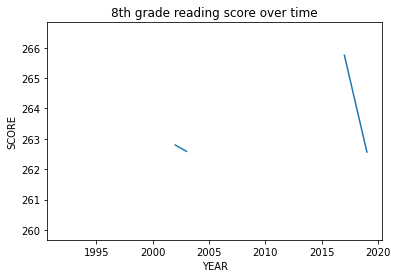

In [13]:
df.groupby('YEAR').AVG_READING_8_SCORE.mean().plot()
plt.ylabel('SCORE')
plt.title('8th grade reading score over time')

**The graph above is meant to show the correlation between both 8th grade reading scores with a rise in instruction expenditure within schools**

**Visualization 2**

Text(0.5, 1.0, '8th grade reading score over time')

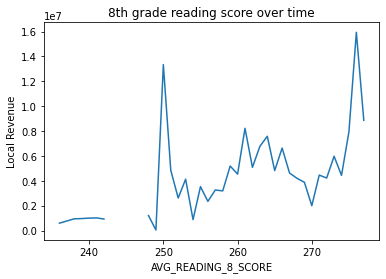

In [9]:
df.groupby('AVG_READING_8_SCORE').LOCAL_REVENUE.mean().plot()
plt.ylabel('Local Revenue')
plt.title('8th grade reading score over time')

**Comparison between local revenue and 8th grade reading scores**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [10]:
from sklearn.model_selection import train_test_split

In [15]:
X = df[['STATE_REVENUE','LOCAL_REVENUE','GRADES_8_G','INSTRUCTION_EXPENDITURE','YEAR']].dropna()
y = df.loc[X.index]['AVG_READING_8_SCORE']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.2, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [17]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [18]:
# create your model here
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [20]:
y_pred = model.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

In [ ]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = ??
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel(??)

<h2> Summary </h2>

**Though my machine learning model didnt end up working in the end (couldnt debug in time), from the EDA I conducted earlier on and the feature selection, I was able to see a direct correlation in 8th grade reading scores over time, with more indirect correlations being between rising scores with state/local funding, as well as increased institutional expenditure. In this checkpoint I learned how to clean and orginize data as well as begin data visualization through EDA and though I couldnt figure out how to get my machine learning to work, I am hopeful that I will be able to debug the problem soon**